In [1]:
%load_ext autoreload
%autoreload 2
# You can load your python module as this:
import modelproject.example

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from scipy import linalg
from scipy import optimize
import sympy as sm

To print nicely:

In [10]:
sm.init_printing(use_unicode=True)

The Solow model with human capital is as follows:

\begin{equation}
Y_t = K_t^{\alpha}H_t^{\varphi}(A_tL_t)^{1-\alpha -\varphi} \tag{1} \\
\end{equation}
\begin{equation}
r_t = \alpha \left(\frac{K_t}{A_t L_t}\right)^{\alpha -1} \left(\frac{H_t}{A_t L_t}\right)^{\varphi} \tag{2}
\end{equation}
\begin{equation}
w_t = (1-\alpha) \left(\frac{K_t}{A_tL_t}\right)^{\alpha} \left(\frac{H_t}{A_tL_t}\right)^{\varphi}A_t \tag{3}
\end{equation}
\begin{equation}
K_{t+1}-K_t = s_K Y_t - \delta K_t \quad , \quad K_0 \text{ given} \tag{4}
\end{equation}
\begin{equation}
H_{t+1}-H_t = s_H Y_t -\delta H_t \quad , \quad H_0 \text{ given} \tag{5}
\end{equation}
\begin{equation}
L_{t+1} = (1+n)L_t \quad , \quad L_0 \text{ given} \tag{6}
\end{equation}
\begin{equation}
A_{t+1} = (1+g)A_t \quad , \quad A_0 \text{ given} \tag{7}
\end{equation}

We also define the following equations:
\begin{equation}
\text{Physical capital per effective worker}: \quad \tilde{k_t} = \frac{K_t}{A_tL_t}
\end{equation}
\begin{equation}
\text{Human capital per effective worker}: \quad \tilde{h_t} = \frac{H_t}{A_tL_t}
\end{equation}
\begin{equation}
\text{Output per effective worker}: \quad \tilde{y_t} = \frac{Y_t}{A_tL_t}
\end{equation}
\begin{equation}
\tilde{y_t} = \tilde{k_t}^{\alpha} \tilde{h_t}^{\varphi}
\end{equation}

Defining all the things as symbols sp we can use sympy:

In [55]:
y = sm.symbols("y_t")
k = sm.symbols("k_t")
r = sm.symbols("r_t")
A = sm.symbols("A_t")
w = sm.symbols("w_t")
n = sm.symbols("n")
g = sm.symbols("g")
sK = sm.symbols("s_K")
sH = sm.symbols("s_H")
alpha = sm.symbols("alpha")
delta = sm.symbols("delta")
phi = sm.symbols("varphi")
ktilde = sm.symbols("ktilde_t")
htilde = sm.symbols("htilde_t")
ytilde = sm.symbols("ytilde_t")

Testing that we get the symbols as wished:

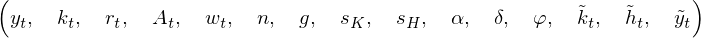

In [57]:
y, k, r, A, w, n, g, sK, sH, alpha, delta, phi, ktilde, htilde, ytilde

We will now find the steady state values for variables $\tilde{k^*}, \tilde{h^*}$ and $\tilde{y^*}$ by solving the following equations:

\begin{equation}
\tilde{k}_{t+1} - \tilde{k}_t = \frac{1}{(1+n)(1+g)}(s_K \tilde{k}_t^{\alpha} \tilde{h}_t^{\varphi} - (n+g+\delta +ng)\tilde{k}_t)
\end{equation}
\begin{equation}
\tilde{h}_{t+1} - \tilde{h}_t = \frac{1}{(1+n)(1+g)}(s_H \tilde{k}_t^{\alpha} \tilde{h}_t^{\varphi} - (n+g+\delta +ng)\tilde{h}_t)
\end{equation}

First we make variables which transform $\tilde{h}_t$ into a function og $\tilde{k}_t$ and vice verca:

In [139]:
ktildealpha = ktilde**alpha
htildephi = htilde**phi
htok = (sH/sK)*ktilde
htokphi = ((sH/sK)*ktilde)**phi
ktoh = (sK/sH)*htilde
ktohalpha = ((sK/sH)*htilde)**alpha

We set up the equation to solve for $\tilde{h}_{t+1} = \tilde{h}_t = \tilde{h}^*$:

In [103]:
eq = sm.Eq(sH*ktildealpha*htildephi - (n+g+delta+n*g)*htilde)
eq

Then we solve it for $\tilde{h}_t$:

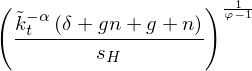

In [104]:
sm.solve(eq,htilde)[0]

Now we insert the transformed $\tilde{h}_t$:

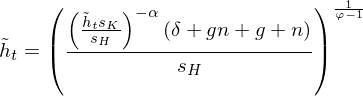

In [117]:
eq2 = sm.Eq(htilde , ((ktoh**(-alpha)*(delta+n*g+g+n)/sH)**(1/(phi-1))))
eq2

And solve for the steady state:

We find that the steady state value for htilde is:


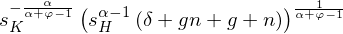

In [141]:
hsteady = sm.solve(eq2,htilde)[0]
print('We find that the steady state value for htilde is:')
hsteady